In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv('datasets/sales.csv', index_col=0)

In [18]:
df.tail()

,week,sales,orders
47,2021-12-24T00:00:00.000Z,3572,64
48,2021-12-31T00:00:00.000Z,3222,72
49,2022-01-07T00:00:00.000Z,3886,72
50,2022-01-14T00:00:00.000Z,3262,64
51,2022-01-21T00:00:00.000Z,4961,97


In [19]:
## Cleaning up the data

df.columns=["week","sales", "orders"]
df.head()

,week,sales,orders
0,2021-01-29T00:00:00.000Z,0,0
1,2021-02-05T00:00:00.000Z,0,0
2,2021-02-12T00:00:00.000Z,0,0
3,2021-02-19T00:00:00.000Z,0,0
4,2021-02-26T00:00:00.000Z,0,0


In [22]:
# Convert Month into Datetime
df['week']=pd.to_datetime(df['week'])
df.head()

,week,sales,orders
0,2021-01-29 00:00:00+00:00,0,0
1,2021-02-05 00:00:00+00:00,0,0
2,2021-02-12 00:00:00+00:00,0,0
3,2021-02-19 00:00:00+00:00,0,0
4,2021-02-26 00:00:00+00:00,0,0


In [23]:
df.shape

(52, 3)

In [25]:
df.set_index('week',inplace=True)

In [26]:
df.head()

,sales,orders
week,,
2021-01-29 00:00:00+00:00,0,0
2021-02-05 00:00:00+00:00,0,0
2021-02-12 00:00:00+00:00,0,0
2021-02-19 00:00:00+00:00,0,0
2021-02-26 00:00:00+00:00,0,0


In [27]:
df.describe()

,sales,orders
count,52.000000,52.000000
mean,1551.500000,30.673077
std,1891.406008,37.007006
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3549.500000,72.500000
max,4961.000000,97.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='week'>

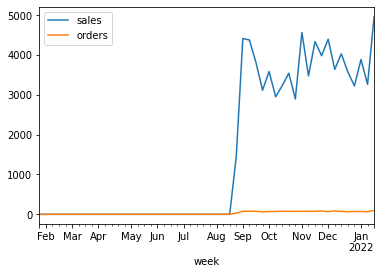

In [28]:
df.plot()

In [29]:
### Testing For Stationarity using Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

In [31]:
test_result=adfuller(df['sales'])

In [32]:

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [34]:
adfuller_test(df['sales'])

ADF Test Statistic : -0.7321028732834384
p-value : 0.8382580365488789
#Lags Used : 0
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Auto Regressive Model

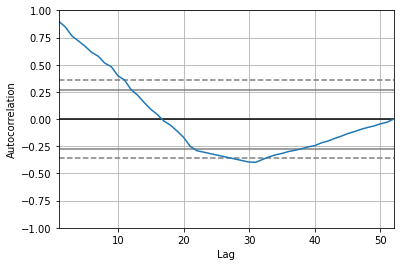

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [97]:
model=ARIMA(df['sales'],order=(1,0,0))
model_fit=model.fit()

C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


In [98]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   52
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -412.569
Date:                Fri, 28 Jan 2022   AIC                            831.139
Time:                        13:52:50   BIC                            836.992
Sample:                    01-29-2021   HQIC                           833.383
                         - 01-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1552.5095   2991.064      0.519      0.604   -4309.869    7414.888
ar.L1          0.9494      0.085     11.201      0.000       0.783       1.116
sigma2      4.356e+05   6.37e+04      6.843      0.000    3.11e+05     5.6e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               133.92
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):              33.03   Skew:                             2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='week'>

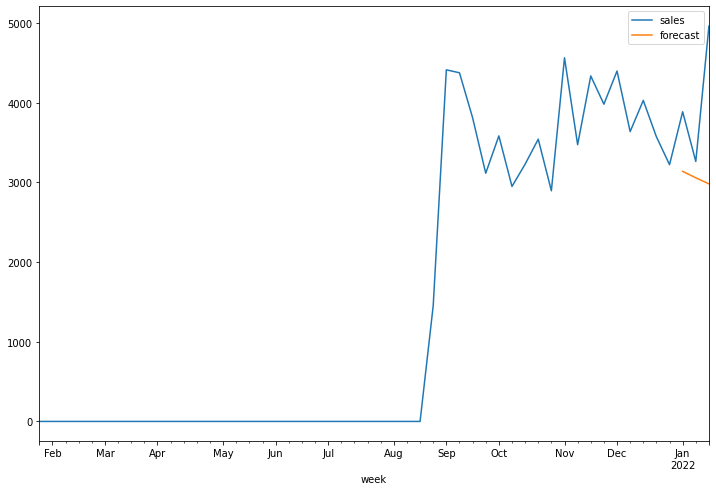

In [99]:
df['forecast']=model_fit.predict(start=49,end=54,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))


O modelo Arima nao consegue lidar com dados que variem de acordo com a epoca e por isso vamos testar o modelo SARIMAX, conhecido por ter essa carateristica.

In [109]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['sales'],order=(0, 1, 0),seasonal_order=(0,1,0,18))
results=model.fit()

C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


In [107]:
results.predict(start=50,end=55,dynamic=True)


2022-01-14 00:00:00+00:00    3813.659988
2022-01-21 00:00:00+00:00    3813.659988
2022-01-28 00:00:00+00:00    3813.659988
2022-02-04 00:00:00+00:00    3813.659988
2022-02-11 00:00:00+00:00    3813.659988
2022-02-18 00:00:00+00:00    3813.659988
Freq: W-FRI, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='week'>

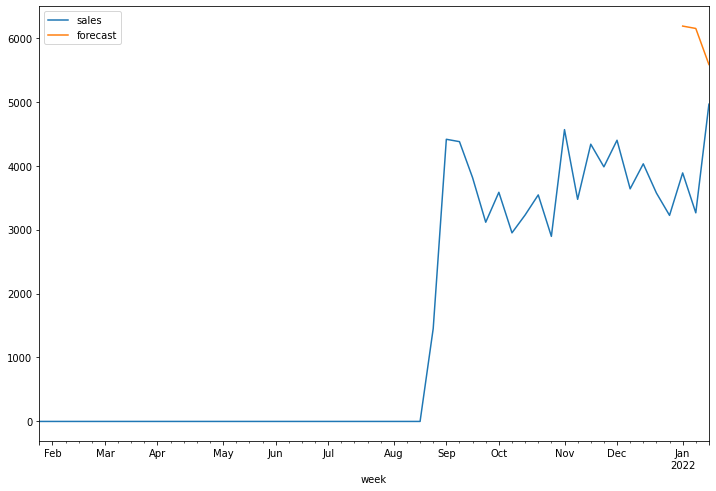

In [110]:
df['forecast']=results.predict(start=49,end=53,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [90]:
from pandas.tseries.offsets import DateOffset
future_dates=df.index[-1] + DateOffset(weeks=1)
future_dates

Timestamp('2022-01-28 00:00:00+0000', tz='UTC')

In [75]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [76]:
future_datest_df.tail()

,sales,orders,forecast
2022-01-28 00:00:00+00:00,NaN,NaN,NaN


In [77]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

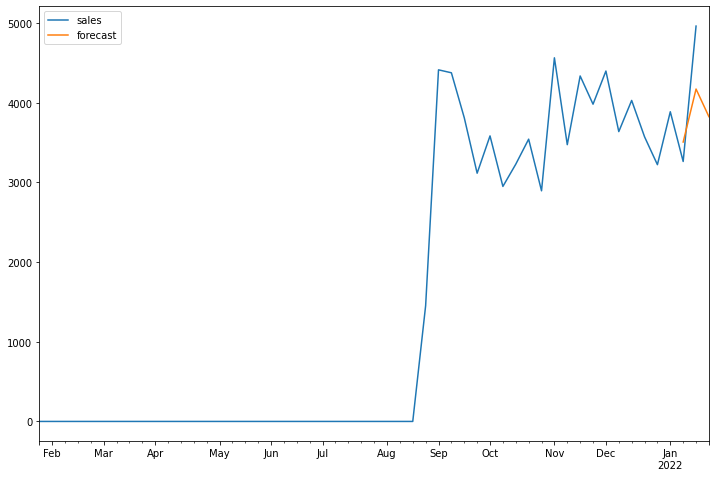

In [78]:
future_df['forecast'] = results.predict(start = 50, end = 60, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))


In [79]:
print(results.predict(start = 50, end = 60, dynamic= True))


2022-01-14 00:00:00+00:00    3505.984575
2022-01-21 00:00:00+00:00    4171.109648
2022-01-28 00:00:00+00:00    3823.979351
2022-02-04 00:00:00+00:00    4027.177981
2022-02-11 00:00:00+00:00    3771.666323
2022-02-18 00:00:00+00:00    3971.483192
2022-02-25 00:00:00+00:00    3821.865243
2022-03-04 00:00:00+00:00    3849.568718
2022-03-11 00:00:00+00:00    3989.566835
2022-03-18 00:00:00+00:00    3688.118270
2022-03-25 00:00:00+00:00    4196.614706
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [79]:
print(df["Sales"])

Month
2019-01-01    2815
2019-02-01    2672
2019-03-01    2755
2019-04-01    2721
2019-05-01    2946
2019-06-01    3036
2019-07-01    2282
2019-08-01    2212
2019-09-01    2922
2019-10-01    4301
2019-11-01    5764
2019-12-01    7312
2020-01-01    2541
2020-02-01    2475
2020-03-01    3031
2020-04-01    3266
2020-05-01    3776
2020-06-01    3230
2020-07-01    3028
2020-08-01    1759
2020-09-01    3595
2020-10-01    4474
2020-11-01    6838
2020-12-01    8357
2021-01-01    3113
2021-02-01    3006
2021-03-01    4047
2021-04-01    3523
2021-05-01    3937
2021-06-01    3986
2021-07-01    3260
2021-08-01    1573
2021-09-01    3528
2021-10-01    5211
2021-11-01    7614
2021-12-01    9254
Name: Sales, dtype: int64
